# Example Load and Plot

In [2]:
import matplotlib.pyplot as plt
import xgcm
import xmitgcm
import xarray as xr
import ecco_v4_py as ecco
import cartopy.feature as cf
import cartopy.crs as ccrs

from llcmap import *

In [30]:
xr.set_options(display_style="html")  # fancy HTML repr

In [5]:
grid_dir = 'datasets/grids/llc90/'

In [6]:
ds = xmitgcm.open_mdsdataset(grid_dir,iters=None,geometry='llc')

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/xmitgcm/mds_store.py:837: UserWarning: Couldn't find available_diagnostics.log in datasets/grids/llc90/ or datasets/grids/llc90/. Using default version.
  "in %s or %s. Using default version." % (data_dir, grid_dir))


In [7]:
# to use ecco_v4_py functions:
ds = ds.rename({'face':'tile'})

In [8]:
mapper = atlantic_map(ds)

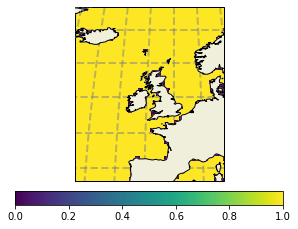

In [20]:
mapper(1*ds.maskC.isel(k=0),lon_0=-0,lat_bds=[40, 70],lon_bds=[-20, 10])

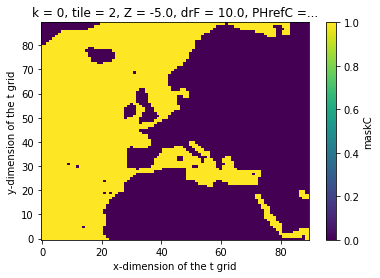

In [29]:
fig = ds.maskC.isel(k=0,tile=2).astype(float).plot()
#ds.maskC.isel(k=0,tile=2).astype(float).plot(col='tile',col_wrap=5)

In [37]:
grid = xgcm.Grid(ds)

In [41]:
edge_mask = ecco.scalar_calc.get_edge_mask(ds.maskC.isel(k=0),grid)
edge_mask

<xarray.DataArray 'maskC' (tile: 13, j: 90, i: 90)>
dask.array<where, shape=(13, 90, 90), dtype=int64, chunksize=(1, 88, 88), chunktype=numpy.ndarray>
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    k          int64 0
  * tile       (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC         (tile, j, i) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YC         (tile, j, i) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    CS         (tile, j, i) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    SN         (tile, j, i) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Z          >f4 -5.0
    rA         (tile, j, i) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Depth      (tile, j, i) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    drF        >f4 10.0
    PHrefC     >f4 49.05
    hFacC      (tile, j, i) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    maskC      (tile, j, i) bool dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    maskCtrlC  (tile, j, i) bool dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
Attributes:
    standard_name:  sea_binary_mask_at_t_location
    long_name:      mask denoting wet point at center

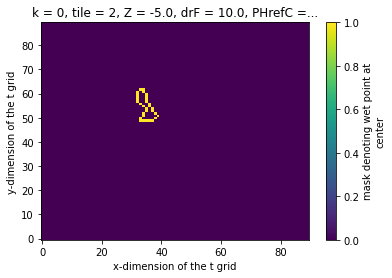

In [90]:
edge_mask_UK = edge_mask.where(ds.XC<3,0)
edge_mask_UK = edge_mask_UK.where(ds.XC>-6,0)
edge_mask_UK = edge_mask_UK.where(ds.YC>50.5,0)
edge_mask_UK = edge_mask_UK.where(ds.YC<60,0)

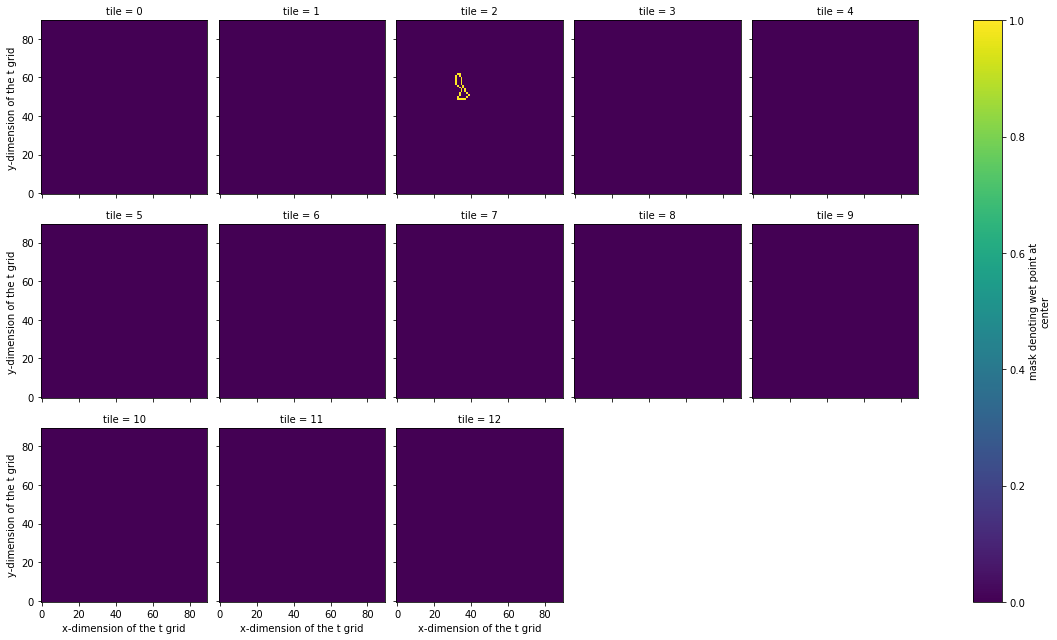

In [92]:
edge_mask_UK.plot(col='tile',col_wrap=5)
#edge_mask_UK.isel(tile=2).plot()

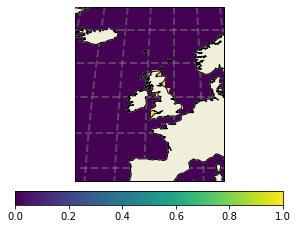

In [91]:
mapper(edge_mask_UK.astype('float'),lon_0=-0,lat_bds=[40, 70],lon_bds=[-20, 10])

In [93]:
extra_metadata = xmitgcm.utils.get_extra_metadata(domain='llc', nx=90)
extra_metadata

{'has_faces': True,
 'ny': 1170,
 'nx': 90,
 'ny_facets': [270, 270, 90, 270, 270],
 'face_facets': [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 4, 4, 4],
 'facet_orders': ['C', 'C', 'C', 'F', 'F'],
 'face_offsets': [0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2],
 'transpose_face': [False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True]}

In [95]:
edge_mask_UK = edge_mask_UK.rename({'tile':'face'})

In [97]:
facets = xmitgcm.utils.rebuild_llc_facets(edge_mask_UK, extra_metadata)
facets

{'facet0': <xarray.DataArray 'maskC' (j: 270, i: 90)>
 dask.array<concatenate, shape=(270, 90), dtype=int64, chunksize=(88, 88), chunktype=numpy.ndarray>
 Coordinates:
     k          int64 0
     PHrefC     >f4 49.05
     drF        >f4 10.0
     Z          >f4 -5.0
   * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
   * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
     face       (j) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 2 2 2 2 2 2 2 2 2 2 2 2 2
     XC         (j, i) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
     YC         (j, i) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
     CS         (j, i) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
     SN         (j, i) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
     rA         (j, i) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
     Depth      (j, i) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
     hFacC      

In [103]:
xmitgcm.utils
#llc_facets_2d_to_compact?

In [105]:
compact = xmitgcm.utils.llc_facets_2d_to_compact(facets, extra_metadata)

In [107]:
xmitgcm.utils.write_to_binary(compact, 'datasets/UK_coast_C')